In [1]:
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
# load data
df = pd.read_csv('cs-training.csv')
df = df.iloc[:, 1:]
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


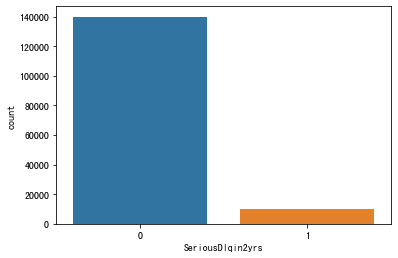

In [3]:
# 可视化违约率
sn.countplot(x='SeriousDlqin2yrs', data=df)

In [4]:
# 违约比例
df['SeriousDlqin2yrs'].sum()/len(df)

0.06684

In [5]:
# 缺失值
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

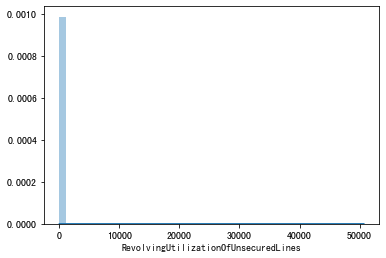

In [7]:
# 直方图分布
sn.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

In [8]:
# 缺失值填充
df = df.fillna(df.median())
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [9]:
# 数据分箱
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df['bin_age'] = pd.cut(df['age'], bins=age_bins)
df[['age', 'bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [10]:
dependent_bins = [-math.inf, 2, 4, 6, 8, 10, math.inf]
df['bin_NumberOfDependents'] = pd.cut(df['NumberOfDependents'], bins=dependent_bins)
df[['NumberOfDependents', 'bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [11]:
dpd_bins = [-math.inf, 1, 2, 3, 4, 5, 6, 7, 8, 9, math.inf]
df['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)
df['bin_NumberOfTimes90DaysLate'] = pd.cut(df['NumberOfTimes90DaysLate'], bins=dpd_bins)

df[['bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [12]:
loans_bins = [-math.inf,0, 1, 2, 3, math.inf]
df['bin_NumberOfOpenCreditLinesAndLoans'] = pd.cut(df['NumberOfOpenCreditLinesAndLoans'], bins=loans_bins)
df[['NumberOfOpenCreditLinesAndLoans', 'bin_NumberOfOpenCreditLinesAndLoans']]

,NumberOfOpenCreditLinesAndLoans,bin_NumberOfOpenCreditLinesAndLoans
0,13,"(3.0, inf]"
1,4,"(3.0, inf]"
2,2,"(1.0, 2.0]"
3,5,"(3.0, inf]"
4,7,"(3.0, inf]"
...,...,...
149995,4,"(3.0, inf]"
149996,4,"(3.0, inf]"
149997,18,"(3.0, inf]"
149998,4,"(3.0, inf]"


In [13]:
df['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df['bin_DebtRatio'] = pd.qcut(df['DebtRatio'], q=5, duplicates='drop')
df['bin_MonthlyIncome'] = pd.qcut(df['MonthlyIncome'], q=5, duplicates='drop')
df['bin_MonthlyIncome'] = pd.qcut(df['MonthlyIncome'], q=5, duplicates='drop')
df['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df['NumberRealEstateLoansOrLines'], q=5, duplicates='drop')

df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_NumberOfOpenCreditLinesAndLoans,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(2.0, 54.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 1.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(1.0, 2.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 1.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 1.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(-0.001, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(3.0, inf]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 1.0]"


In [14]:
# 分箱字段
bin_cols = [c for c in df.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberRealEstateLoansOrLines']

In [15]:
# 计算IV， 衡量变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        # 得到feature字段的第i个分箱取值val
        val = list(df[feature].unique())[i]
        # 统计featur， feature_value, 这个value的个数，这个value导致target=1的个数
        lst.append([feature, val, df[df[feature] == val].count()[feature], \
            df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
    
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]
    
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv'] = (data['woe'] * (data['Margin Bad'] - data['Margin Good'])).sum()
    data = data.sort_values(by=['Variable', 'Value'])
    
    return data['iv'].values[0]
cal_IV(df, 'bin_age', 'SeriousDlqin2yrs')

0.24041120302785982

In [16]:
# 计算每个字段的IV值
for e in bin_cols:
    if cal_IV(df, e, 'SeriousDlqin2yrs') > 0.1:
        print(e)

bin_age
bin_NumberOfTime30-59DaysPastDueNotWorse
bin_NumberOfTime60-89DaysPastDueNotWorse
bin_NumberOfTimes90DaysLate
bin_NumberOfOpenCreditLinesAndLoans
bin_RevolvingUtilizationOfUnsecuredLines


In [17]:
features_cols = ['age',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'NumberOfOpenCreditLinesAndLoans',
                'RevolvingUtilizationOfUnsecuredLines']
features_cols

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfOpenCreditLinesAndLoans',
 'RevolvingUtilizationOfUnsecuredLines']

In [18]:
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target: ['sum', 'count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+'sum': 'bad', target+'count': 'all'})

        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        df_woe['woe'] = np.log1p(df_woe['margin bad'] / df_woe['margin good'])

        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe, on=f, how='left')
        
    return df_new

df_woe = cal_WOE(df, bin_cols, 'SeriousDlqin2yrs')

In [19]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_MonthlyIncome,margin bad_bin_MonthlyIncome,margin good_bin_MonthlyIncome,woe_bin_MonthlyIncome,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,28606,0.138340,0.204367,0.516960,841,9952,9111,0.083882,0.065091,0.827981
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,27500,0.278177,0.196465,0.882076,7420,108526,101106,0.740076,0.722320,0.705363
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,27500,0.278177,0.196465,0.882076,7420,108526,101106,0.740076,0.722320,0.705363
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,27500,0.278177,0.196465,0.882076,7420,108526,101106,0.740076,0.722320,0.705363
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,28606,0.138340,0.204367,0.516960,7420,108526,101106,0.740076,0.722320,0.705363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,27500,0.278177,0.196465,0.882076,7420,108526,101106,0.740076,0.722320,0.705363
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,28142,0.181428,0.201052,0.643114,7420,108526,101106,0.740076,0.722320,0.705363
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,55726,0.402055,0.398117,0.698081,7420,108526,101106,0.740076,0.722320,0.705363
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,28142,0.181428,0.201052,0.643114,7420,108526,101106,0.740076,0.722320,0.705363


In [20]:
# 得到WOE规则
df_bin_to_woe = pd.DataFrame(columns=['features', 'bin', 'woe'])
for f in features_cols:
    b = 'bin_' + f
    w = 'woe_bin_' + f
    df_2 = df_woe[[w, b]].drop_duplicates()
    df_2.columns = ['woe', 'bin']
    df_2['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe, df_2])
df_bin_to_woe

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848
19,age,"(-inf, 25.0]",1.013134
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111


In [21]:
# 数据切分
from sklearn.model_selection import train_test_split

woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]

x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=123)

In [23]:
# LR 建模
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
lr_model = LogisticRegression(random_state=123).fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(accuracy_score(y_pred, y_test))
print(roc_auc_score(y_pred, y_test))

0.9362333333333334
0.7651357104135028
